# n8n Templates CSV Analysis

This notebook reads and analyzes the n8n_Templates.csv file to explore the available workflow templates.

## 1. Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

## 2. Load the CSV File

In [6]:
# Read the CSV file
try:
    df = pd.read_csv('n8n_Templates.csv')
    print("✅ File loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
except FileNotFoundError:
    print("❌ File 'n8n_Templates.csv' not found. Please ensure it's in the same directory as this notebook.")
except Exception as e:
    print(f"❌ Error loading file: {e}")

✅ File loaded successfully!
📊 Dataset shape: (239, 9)


## 3. Basic Data Exploration

In [9]:
# Display first few rows
print("\n📋 First 5 rows of the dataset:")
display(df.head())


📋 First 5 rows of the dataset:


,name,title,description,creator,youtube_url,template_url,date_posted,resource_url,id
0,AI Agent with Zep Memory,Unlock the Next Evolution of Agents with Human...,This video demonstrates a complete workflow wh...,Nate Herk | AI Automation,https://www.youtube.com/watch?v=kNsX2qu8jHY,https://drive.google.com/file/d/1-ewG4vHJQ4nRS...,2025-07-14T14:07:21.000Z,https://www.skool.com/ai-automation-society/ne...,kNsX2qu8jHY
1,Parallel Workflow Accelerator,Only 1% of n8n Builders Use This Trick (7x fas...,This video by Nate Herk demonstrates an advanc...,Nate Herk | AI Automation,https://www.youtube.com/watch?v=qNW9KaLe1nY,https://drive.google.com/file/d/1Ley71JVdGrUo-...,2025-07-09T14:06:34.000Z,https://www.skool.com/ai-automation-society/ne...,qNW9KaLe1nY
2,Podcast Clip Automation,Generate 100s of Viral Podcast TikTok Clips & ...,This system automates the conversion of long-f...,Nick Saraev,https://www.youtube.com/watch?v=yueOIxkDig0,https://drive.google.com/file/d/1GSHGp8PUI_7ZV...,2025-07-02T06:46:01.000Z,https://leftclicker.gumroad.com/l/panag,yueOIxkDig0
3,AI Resume Screening System,Watch Me Build an AI Resume Analysis System in...,"In this tutorial, Nate Herk builds a no-code A...",Nate Herk | AI Automation,https://www.youtube.com/watch?v=M0s6O8xtVUE,https://drive.google.com/file/d/1dFPQN0ydpHBKz...,2025-06-30T17:00:55.000Z,https://www.skool.com/ai-automation-society/ne...,M0s6O8xtVUE
4,RAG Agents Workflow,n8n Just Leveled Up RAG Agents (Reranking & Me...,This system demonstrates a no-code AI agent th...,Nate Herk | AI Automation,https://www.youtube.com/watch?v=xWhX61651H8,https://drive.google.com/file/d/1ee6skeDuBnYYV...,2025-06-28T14:52:09.000Z,https://www.skool.com/ai-automation-society/ne...,xWhX61651H8


In [11]:
# Display dataset information
print("\n📈 Dataset Info:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n📝 Column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


📈 Dataset Info:
Number of rows: 239
Number of columns: 9

📝 Column names:
1. name
2. title
3. description
4. creator
5. youtube_url
6. template_url
7. date_posted
8. resource_url
9. id


In [13]:
# Data types and missing values
print("\n🔍 Data Types and Missing Values:")
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
display(df_info)


🔍 Data Types and Missing Values:


,Data Type,Non-Null Count,Null Count,Null Percentage
name,object,239,0,0.00
title,object,239,0,0.00
description,object,239,0,0.00
creator,object,239,0,0.00
youtube_url,object,239,0,0.00
template_url,object,180,59,24.69
date_posted,object,239,0,0.00
resource_url,object,239,0,0.00
id,object,239,0,0.00


## 4. Statistical Summary

In [16]:
# Statistical summary for numerical columns
print("\n📊 Statistical Summary (Numerical Columns):")
display(df.describe())


📊 Statistical Summary (Numerical Columns):


,name,title,description,creator,youtube_url,template_url,date_posted,resource_url,id
count,239,239,239,239,239,180,239,239,239
unique,235,239,239,15,239,180,239,214,239
top,Newsletter Automation,Unlock the Next Evolution of Agents with Human...,This video demonstrates a complete workflow wh...,Nate Herk | AI Automation,https://www.youtube.com/watch?v=kNsX2qu8jHY,https://drive.google.com/file/d/1-ewG4vHJQ4nRS...,2025-07-14T14:07:21.000Z,https://www.skool.com/ai-automation-society/about,kNsX2qu8jHY
freq,3,1,1,88,1,1,1,16,1


In [18]:
# Summary for categorical columns
print("\n📊 Summary for Categorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n📌 {col}:")
    print(f"   Unique values: {df[col].nunique()}")
    if df[col].nunique() <= 10:  # Only show value counts if not too many unique values
        print(f"   Value counts:")
        print(df[col].value_counts().head())


📊 Summary for Categorical Columns:

📌 name:
   Unique values: 235

📌 title:
   Unique values: 239

📌 description:
   Unique values: 239

📌 creator:
   Unique values: 15

📌 youtube_url:
   Unique values: 239

📌 template_url:
   Unique values: 180

📌 date_posted:
   Unique values: 239

📌 resource_url:
   Unique values: 214

📌 id:
   Unique values: 239


## 5. Data Visualization

In [21]:
# Plot distribution of numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

if len(numerical_cols) > 0:
    print("\n📈 Distribution of Numerical Columns:")
    
    # Calculate number of subplots needed
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            df[col].hist(bins=30, ax=axes[i], alpha=0.7)
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
    
    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found in the dataset.")

No numerical columns found in the dataset.



📊 Top Categories in Categorical Columns:


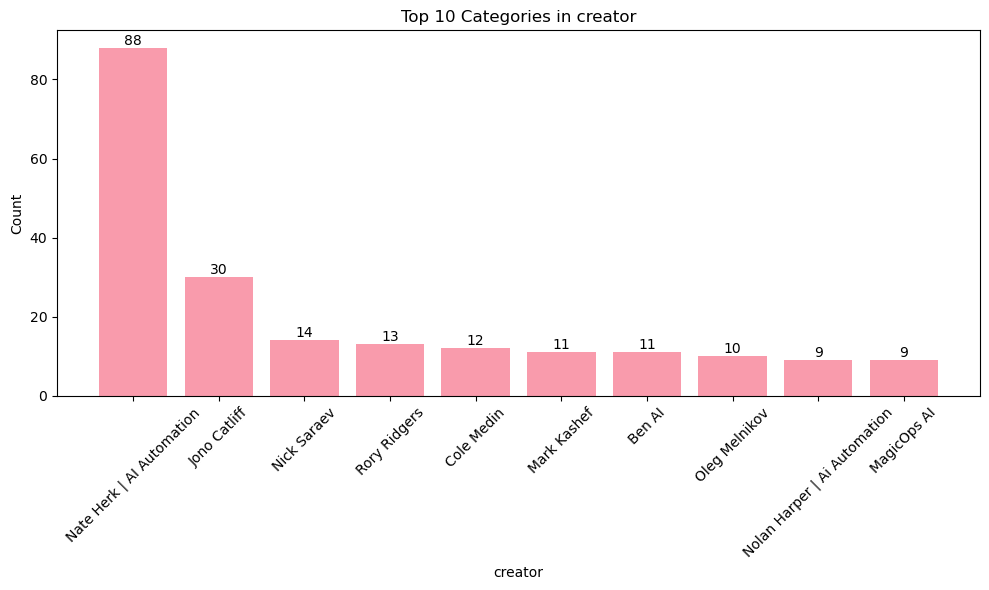

In [23]:
# Top categories for categorical columns (for columns with reasonable number of unique values)
print("\n📊 Top Categories in Categorical Columns:")

for col in categorical_cols:
    unique_count = df[col].nunique()
    if 1 < unique_count <= 20:  # Only plot if reasonable number of categories
        plt.figure(figsize=(10, 6))
        
        # Get value counts and plot
        value_counts = df[col].value_counts().head(10)
        
        if len(value_counts) > 0:
            bars = plt.bar(range(len(value_counts)), value_counts.values, alpha=0.7)
            plt.title(f'Top {len(value_counts)} Categories in {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            
            # Add value labels on bars
            for bar, count in zip(bars, value_counts.values):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                        str(count), ha='center', va='bottom')
            
            plt.xticks(range(len(value_counts)), value_counts.index, rotation=45)
            plt.tight_layout()
            plt.show()

## 6. Data Quality Check

In [26]:
# Check for duplicates
print("\n🔍 Data Quality Check:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Check for empty strings
empty_strings = (df.applymap(lambda x: x == '')).sum().sum()
print(f"Number of empty strings: {empty_strings}")

# Check for whitespace-only strings
whitespace_only = (df.applymap(lambda x: isinstance(x, str) and x.strip() == '')).sum().sum()
print(f"Number of whitespace-only strings: {whitespace_only}")


🔍 Data Quality Check:
Number of duplicate rows: 0
Number of empty strings: 0
Number of whitespace-only strings: 0


## 7. Sample Data Exploration

In [29]:
# Display random sample of the data
print("\n🎲 Random Sample of 5 Rows:")
display(df.sample(5, random_state=42))


🎲 Random Sample of 5 Rows:


,name,title,description,creator,youtube_url,template_url,date_posted,resource_url,id
24,YouTube Growth Automation,How I 14x’d My YouTube Channel in 7 Days (AI +...,This workflow system automates YouTube channel...,Nolan Harper | Ai Automation,https://www.youtube.com/watch?v=t6iPH93krzY,https://drive.google.com/file/d/1aX49kZzkWZDXa...,2025-05-30T14:38:24.000Z,https://www.skool.com/ai-automation-vault/clas...,t6iPH93krzY
6,Meeting Prep Automation,This n8n Automation Does ALL My Meeting Prep W...,Mark Kashef demonstrates an advanced automatio...,Mark Kashef,https://www.youtube.com/watch?v=9HBa364RZBk,https://drive.google.com/file/d/1vH6R5eVJJGNTg...,2025-06-27T18:20:17.000Z,https://bit.ly/4lb7E8k,9HBa364RZBk
93,CRM Data Automation,AI AUTOMATES Your CRM Updates!,MagicOps AI presents a dedicated workflow that...,MagicOps AI,https://www.youtube.com/watch?v=_oNrsL0GJBw,https://drive.google.com/file/d/1LVW2SP7kXj_hg...,2025-04-04T13:17:24.000Z,https://gumroad.com/d/f67aa50d0a992eee842d744e...,_oNrsL0GJBw
109,MCP Workflow Setup,"Ultimate No Code MCP Setup Guide (Self-Host, I...","In this detailed setup guide, Nate Herk walks ...",Nate Herk | AI Automation,https://www.youtube.com/watch?v=OUPW4DJMAsA,https://drive.google.com/file/d/1D2_NfUDEWV7UI...,2025-03-17T22:03:48.000Z,https://www.skool.com/ai-automation-society/ne...,OUPW4DJMAsA
104,Document OCR Automation,Understand ANY Document with Mistral OCR in n8...,Creator Nate Herk demonstrates a step-by-step ...,Nate Herk | AI Automation,https://www.youtube.com/watch?v=85qo6qC4r-0,https://drive.google.com/file/d/1LGe7nJeBrarMK...,2025-03-25T18:43:27.000Z,https://www.skool.com/ai-automation-society/ne...,85qo6qC4r-0


In [31]:
# Display last few rows
print("\n📋 Last 5 rows of the dataset:")
display(df.tail())


📋 Last 5 rows of the dataset:


,name,title,description,creator,youtube_url,template_url,date_posted,resource_url,id
234,Hormozi AI Tool,I Built Hormozi's $6K AI Tool For FREE (n8n Gu...,"In this detailed tutorial by Oleg Melnikov, a ...",Oleg Melnikov,https://www.youtube.com/watch?v=qHb8jG1-3Jg,NaN,2025-10-04T14:51:26.000Z,https://www.skool.com/n8nlab/about,qHb8jG1-3Jg
235,Recruiting Automation,I Automated a Recruiting Agency with AI (No-Code),"In this video, Ben AI demonstrates a full recr...",Ben AI,https://www.youtube.com/watch?v=LJA7sawCvec,NaN,2025-10-06T12:00:06.000Z,https://c.benai.co/hwaar-recruit,LJA7sawCvec
236,Viral Reels Clone,I built a 24/7 Viral Reels clone machine with ...,This system is an end-to-end automation workfl...,Sabrina Ramonov 🍄,https://www.youtube.com/watch?v=BdKqEkdvlgQ,NaN,2025-10-08T17:44:47.000Z,https://help.blotato.com/api/template...,BdKqEkdvlgQ
237,AI Lead Magnet System,Build ANYTHING with Base44 and n8n AI Agents (...,This video by Nate Herk demonstrates a complet...,Nate Herk | AI Automation,https://www.youtube.com/watch?v=tFFKuq2t0rI,NaN,2025-10-10T13:10:39.000Z,https://www.skool.com/ai-automation-society/about,tFFKuq2t0rI
238,Job App Automation,Apply to 100+ Jobs in Minutes Using AI (Indeed...,This video by Jono Catliff demonstrates a deta...,Jono Catliff,https://www.youtube.com/watch?v=LIzZRgfW4ok,NaN,2025-10-12T15:28:12.000Z,https://jonocatliff.gumroad.com/l/qgouod,LIzZRgfW4ok


In [33]:
# Format date_posted column to YYYY-MM-DD
print("Before formatting:")
print(df['date_posted'].head())

df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce').dt.strftime('%Y-%m-%d')

print("\nAfter formatting:")
print(df['date_posted'].head())

# Check for any failed conversions
if df['date_posted'].isna().any():
    print(f"\n⚠️  Warning: {df['date_posted'].isna().sum()} dates could not be converted")

Before formatting:
0    2025-07-14T14:07:21.000Z
1    2025-07-09T14:06:34.000Z
2    2025-07-02T06:46:01.000Z
3    2025-06-30T17:00:55.000Z
4    2025-06-28T14:52:09.000Z
Name: date_posted, dtype: object

After formatting:
0    2025-07-14
1    2025-07-09
2    2025-07-02
3    2025-06-30
4    2025-06-28
Name: date_posted, dtype: object


## 7. Text Analysis - Workflow Categories


🔍 Analyzing Workflow Categories from Titles:


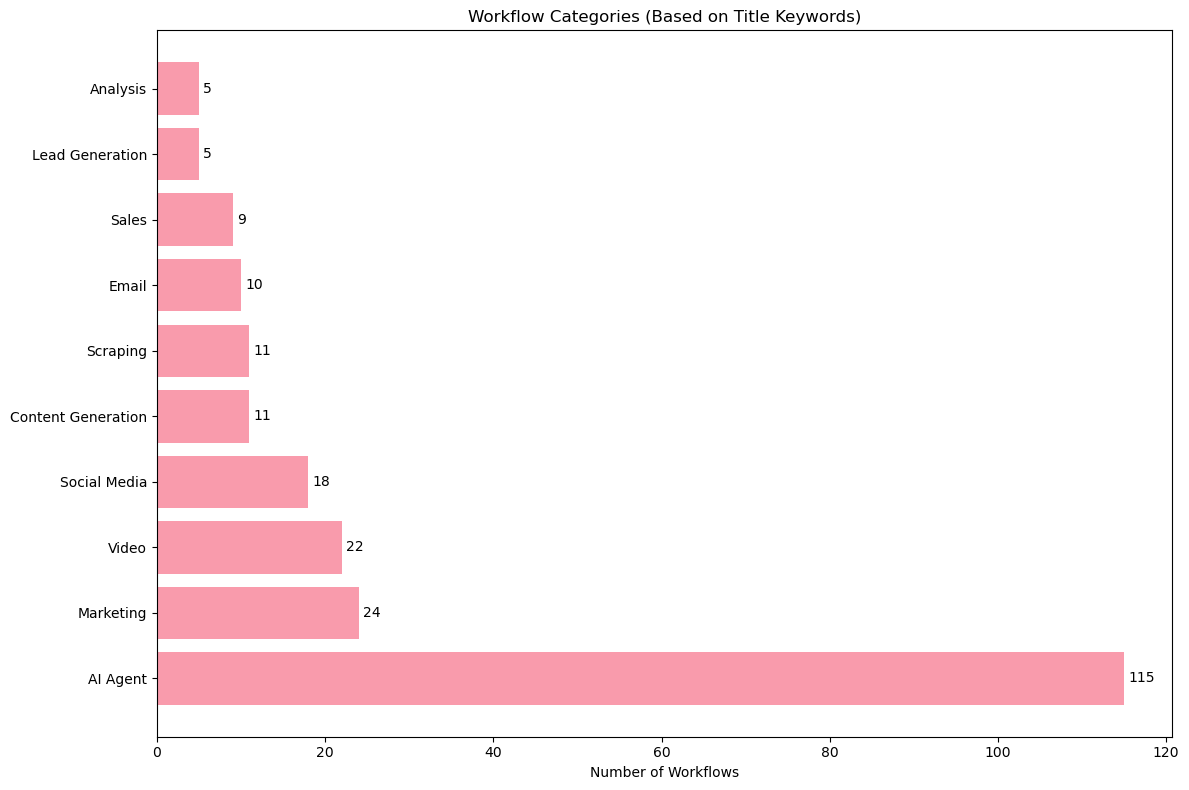

In [39]:
# Extract common categories from titles
print("\n🔍 Analyzing Workflow Categories from Titles:")

# Common AI/automation categories
categories = {
    'AI Agent': ['ai agent', 'agent', 'assistant'],
    'Content Generation': ['content', 'generate', 'writer', 'creator'],
    'Social Media': ['social', 'twitter', 'linkedin', 'instagram', 'tiktok', 'facebook'],
    'Video': ['video', 'reel', 'shorts', 'youtube', 'tiktok'],
    'Email': ['email', 'gmail', 'outlook'],
    'Scraping': ['scrape', 'scraper', 'crawl'],
    'Lead Generation': ['lead', 'prospect', 'outreach'],
    'Sales': ['sales', 'cold', 'crm'],
    'Marketing': ['marketing', 'ad', 'campaign'],
    'Analysis': ['analyze', 'analysis', 'insight', 'report']
}

# Count occurrences of each category
category_counts = {}
for category, keywords in categories.items():
    count = 0
    for title in df['title'].str.lower():
        if any(keyword in title for keyword in keywords):
            count += 1
    category_counts[category] = count

# Plot category distribution
plt.figure(figsize=(12, 8))
sorted_categories = dict(sorted(category_counts.items(), key=lambda x: x[1], reverse=True))
bars = plt.barh(range(len(sorted_categories)), list(sorted_categories.values()), alpha=0.7)
plt.title('Workflow Categories (Based on Title Keywords)')
plt.xlabel('Number of Workflows')
plt.yticks(range(len(sorted_categories)), list(sorted_categories.keys()))

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, sorted_categories.values())):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            str(count), ha='left', va='center')

plt.tight_layout()
plt.show()

In [45]:
result = df.query('title.str.lower().str.contains("scrape|scraper|crawl")', engine='python')
result

,name,title,description,creator,youtube_url,template_url,date_posted,resource_url,id
23,Web Scraper Agent,This AI Agent Can Scrape and Screenshot the We...,"In this tutorial, Nate Herk demonstrates a no-...",Nate Herk | AI Automation,https://www.youtube.com/watch?v=3Pim6uCASSE,https://drive.google.com/file/d/1klYxj1CZI2sLF...,2025-06-03,https://www.skool.com/ai-automation-society/ne...,3Pim6uCASSE
37,Website Data Scraper,Scrape ANY Website Automatically with n8n + Ap...,This system automates the extraction of busine...,Jono Catliff,https://www.youtube.com/watch?v=PxQwzoPmP3M,https://drive.google.com/file/d/1KUXLIeeWbxR41...,2025-05-15,https://gumroad.com/d/02b6ee592182833be9d06cf8...,PxQwzoPmP3M
52,Google Map Scraper,Scrape Unlimited Leads WITHOUT Paying for APIs...,This system scrapes email leads from Google Ma...,Nick Saraev,https://www.youtube.com/watch?v=OroDNJl-pyc,https://drive.google.com/file/d/1Kxsl2-sbZGKPq...,2025-05-01,https://gumroad.com/d/8da9e170307de246b96a0eec...,OroDNJl-pyc
77,Social Media Scraper,Steal This AI Post Scraper (Free n8n Build),This system automates scraping of posts and vi...,Nolan Harper | Ai Automation,https://www.youtube.com/watch?v=fhxqdoP7ivE,https://drive.google.com/file/d/14m6BvV1jlPb5_...,2025-04-14,https://www.skool.com/ai-automation-vault/clas...,fhxqdoP7ivE
79,Website Extractor,Turn Any Website Into LLM Ready Data in Second...,This system transforms any website into LLM-re...,Nate Herk | AI Automation,https://www.youtube.com/watch?v=Ee9WtEEd300,https://drive.google.com/file/d/1a5dDs4QXa4e7a...,2025-04-13,https://www.skool.com/ai-automation-society/ne...,Ee9WtEEd300
86,Crawl4AI Scraper,Scrape ANY Website for FREE with Crawl4AI + n8...,"This workflow integrates a locally hosted, Doc...",Mahmut Kasimoglu | AI Automation,https://www.youtube.com/watch?v=1CDGpbZItiY,https://drive.google.com/file/d/1qVgaZbTZdlcL3...,2025-04-09,https://www.skool.com/business-ai-alliance/scr...,1CDGpbZItiY
111,Twitter Data Scraper,How to Actually Scrape Twitter/X Data with n8n,This system demonstrates an end-to-end workflo...,Nate Herk | AI Automation,https://www.youtube.com/watch?v=lEo7IAgj0UY,https://drive.google.com/file/d/1Zg5rvw2q9PV43...,2025-03-15,https://www.skool.com/ai-automation-society/ne...,lEo7IAgj0UY
112,Scraper Agent,This n8n Agent can scrape ANYTHING (no code),This workflow is a no-code scraping AI agent b...,Rory Ridgers,https://www.youtube.com/watch?v=TDB-St0V5vM,https://drive.google.com/file/d/1LuHzN-7UETUS2...,2025-03-14,https://commonous.com/templates/068198eb-3b7c-...,TDB-St0V5vM
139,Google Maps Scraper,This AI Agent Can Scrape ANYTHING (100% Automa...,"In this workflow, Jono Catliff demonstrates an...",Jono Catliff,https://www.youtube.com/watch?v=VAaFsqu5NE8,https://drive.google.com/file/d/1wEG5BF066ilFl...,2025-02-15,https://gumroad.com/d/c2f0b73487e92de5ddcb5ac8...,VAaFsqu5NE8
155,Crawl4AI Web Scraper,n8n + Crawl4AI - Scrape ANY Website in Minutes...,This system integrates an open-source web scra...,Cole Medin,https://www.youtube.com/watch?v=c5dw_jsGNBk,https://drive.google.com/file/d/1nUl0j6Y7HQRcE...,2025-01-27,https://github.com/TEN-framework/ten-framework,c5dw_jsGNBk


## 8. Export Cleaned Data (Optional)

In [45]:
# Option to save cleaned data
save_cleaned = input("\n💾 Do you want to save a cleaned version of the data? (y/n): ")

if save_cleaned.lower() == 'y':
    # Remove completely empty columns
    cleaned_df = df.dropna(axis=1, how='all')
    
    # Fill or drop other missing values based on your needs
    # For example: cleaned_df = cleaned_df.fillna('Unknown')
    
    # Save to new CSV
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'n8n_Templates_cleaned_{timestamp}.csv'
    cleaned_df.sort_values(by=["creator","date_posted"],ascending=[True,True]).to_csv(filename, index=False)
    print(f"✅ Cleaned data saved as: {filename}")
else:
    print("❌ Data export cancelled.")


💾 Do you want to save a cleaned version of the data? (y/n):  y


✅ Cleaned data saved as: n8n_Templates_cleaned_20251015_153801.csv


## Summary

In [43]:
print("\n" + "="*50)
print("📋 ANALYSIS SUMMARY")
print("="*50)
print(f"📊 Total Records: {df.shape[0]:,}")
print(f"📝 Total Columns: {df.shape[1]}")
print(f"🔢 Numerical Columns: {len(numerical_cols)}")
print(f"📝 Categorical Columns: {len(categorical_cols)}")
print(f"⚠️  Missing Values: {df.isnull().sum().sum()}")
print(f"🔍 Duplicate Rows: {df.duplicated().sum()}")
print("="*50)


📋 ANALYSIS SUMMARY
📊 Total Records: 239
📝 Total Columns: 9
🔢 Numerical Columns: 0
📝 Categorical Columns: 9
⚠️  Missing Values: 59
🔍 Duplicate Rows: 0
